# Introducción a las Imagenes Digitales

Este <i>notebook</i> ayudará a dar su primer paso en el aprendizaje del Procesamiento de Imágenes y la Visión por Computador usando OpenCV. Se aprenderán lecciones importantes utilizando algunos ejemplos sencillos. En esta práctica, usted aprenderá los siguientes conceptos:
<ul>
<li>Leer una imagen</li>
<li>Comprobar los atributos de la imagen, como el tipo de datos y la forma</li>
<li>Visualización de imágenes con matplotlib y OpenCV</li>
<li>Guardar una imagen</li>
<li>Cargar un video</li>
<li>Mostrar un video</li>
<li>Acceder a la webcam</li>
</ul>

## Importar librerías
En Python, las bibliotecas se utilizan para referirse a una colección de módulos que se utilizan repetidamente en varios programas sin necesidad de escribirlos desde cero. Los módulos suelen contener código como funciones, clases y sentencias que pueden importarse y utilizarse dentro de otros programas.  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Mostrar la imagen directamente
La lectura, la visualización y la escritura de imágenes son básicas para el procesamiento de imágenes y la visión por ordenador.  Incluso al recortar, redimensionar, rotar o aplicar diferentes filtros para procesar las imágenes, tendrás que leer primero las imágenes. Por eso es importante que se dominen estas operaciones básicas. Utilizaremos las siguientes imágenes como ejemplo. Utilizaremos la función ipython image para cargar y mostrar la imagen.

In [3]:
# Mostrar imagen de 18x18 pixeles
Image(filename='Recursos\checkerboard_18x18.png')

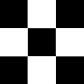

In [4]:
# Mostrar imagen de 84x84 pixeles
Image(filename='Recursos\checkerboard_84x84.jpg')

### Lectura y Escritura de imagenes en OpenCV
OpenCV, la mayor librería de visión por ordenador del mundo tiene estas tres funciones incorporadas:

`imread()` nos ayuda a leer una imagen <br>
`imshow()` muestra una imagen en una ventana <br>
`imwrite()` escribe una imagen en el directorio de archivos <br>

## Lectura de Imagenes en OpenCV
OpenCV permite leer diferentes tipos de imágenes (JPG, PNG, etc). Puedes cargar imágenes en escala de grises, en color o también puedes cargar imágenes con canal alfa. Utiliza la función **`cv2.imread()`** que tiene la siguiente sintaxis:

#### Sintaxis de Función

``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Es la imagen si se ha cargado con éxito. En caso contrario es `None`. Esto puede ocurrir si el nombre del archivo es incorrecto o el archivo está corrupto.

La función tiene **1 argumento de entrada requerido** y una bandera opcional:


1. `filename`: Puede ser una ruta **absoluta** o **relativa**. Este es un **argumento obligatorio**.
2. `flags`:    Estas banderas se utilizan para leer una imagen en un formato determinado (por ejemplo, escala de grises/color/con canal alfa). Este es un **argumento opcional** con un valor por defecto de `cv2.IMREAD_COLOR` o `1` que carga la imagen como una imagen en color.

**Banderas**
1. **`cv2.IMREAD_GRAYSCALE`** o **`0`**: Carga la imagen en modo escala de grises
2. **`cv2.IMREAD_COLOR`** o **`1`**: Carga una imagen en color. Cualquier transparencia de la imagen será ignorada. Es la bandera por defecto.
3. **`cv2.IMREAD_UNCHANGED`** o **`-1`**: Carga la imagen como tal, incluyendo el canal alfa.

In [2]:
cb_img = cv2.imread('Recursos\checkerboard_18x18.png', cv2.IMREAD_GRAYSCALE)
# Imprime los datos de la imagen (valores de los píxeles), elemento de un array 2D numpy.
# Cada valor de píxel es de 8 bits [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

### Valor de Pixeles (Profundidad)

<img src="Demostrativas/Bit_Depth.png" width=600 height=400 />

#### Tipos de imágenes
Básicamente existen múltiples tipos de imágenes, pero contemplaremos cuatro tipos típicos:

<ul>
<li><b>Imagen binaria</b>: Formada únicamente por píxeles blancos y negros, que son 0 para el blanco o 1 para el negro. Este tipo se utiliza a menudo en el procesamiento de imágenes, por ejemplo, en el reconocimiento óptico de caracteres para reconocer letras y texto en imágenes.</li>
<li><b>Imagen en blanco y negro</b>: Las imágenes en blanco y negro, especialmente en fotografía, suelen ser imágenes en escala de grises. Esto significa que los píxeles no sólo consisten en el color blanco y negro, sino que cada píxel es un matiz de 256 tonos de gris diferentes.</li>
<li><b>Imagen en color de 8 bits</b>: La mayoría de las imágenes digitales en color que se encuentran son imágenes en color de 8 bits. Es el tipo más popular. En las imágenes digitales típicas, cada píxel está formado por un número entero de 8 bits, lo que da lugar a 256 estados posibles.</li>
<li><b>Imagen en color de 16 bits</b>: Es una imagen de color más compleja, que no es tan popular como su hermano pequeño, la imagen de color de 8 bits. Llevado 2 a la potencia de 16 conduce a 65536 tonos diferentes de un color para cada canal de color de un píxel.</li>
</ul>

### Otro Ejemplo

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

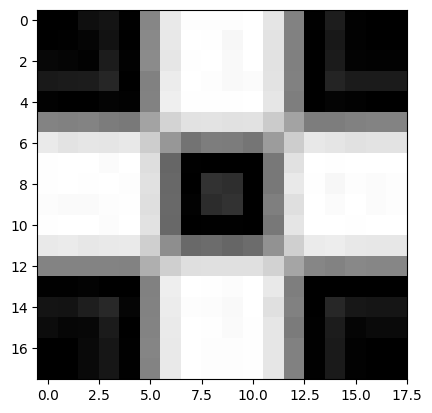

In [3]:
cb_img_fuzzy = cv2.imread("Recursos/checkerboard_fuzzy_18x18.jpg",cv2.IMREAD_GRAYSCALE)

# print image
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy,cmap='gray')

## Mostrar atributos de la imagen
Para verificar el tamaño y la profundidad de las imagenes mostradas anteriormente, podemos acceder a sus atributos mediante los siguientes comandos.

In [4]:
# imprimir el tamaño de la imagen
print('Tamaño de la imagen es', cb_img.shape)

# imprimir el tipo de dato de la imagen
print('Tipo de dato de la imagen es', cb_img.dtype)

Tamaño de la imagen es (18, 18)
Tipo de dato de la imagen es uint8


## Mostrar Imagenes en OpenCV
La función **`imshow()`** de OpenCV se utiliza para mostrar una imagen. La sintaxis es la siguiente:

#### Sintaxis de Función

``` python
cv2.imshow(winname, mat)
```

La función tiene **2 argumentos obligatorio de entrada requeridos**:

1. `winname`: especifica el nombre de la ventana que se mostrará en la pantalla.
2. `mat`: La imagen que se desea mostrar.

Especifique un nuevo nombre de ventana para cada imagen que desee mostrar para mostrar varias fotos a la vez. Las rutinas `waitKey()` y `destroyAllWindows()` / `destroyWindow()` están pensadas para trabajar junto con la función `imshow()`.

### Funciones auxiliares para mostrado de Imagen
#### cv2.waitKey()

La función `waitkey()` de Python OpenCV permite a los usuarios mostrar una ventana durante unos milisegundos determinados o hasta que se pulse cualquier tecla. Toma el tiempo en milisegundos como parámetro y espera el tiempo dado para destruir la ventana, si se pasa 0 en el argumento espera hasta que se pulse cualquier tecla.

``` python
retval = cv2.waitKey(delay)
```

Si se pasa un valor positivo a la función waitKey(), ésta espera la pulsación de una tecla sólo durante el tiempo especificado por el valor pasado en milisegundos. Si se pulsa alguna tecla durante este periodo, esta función devuelve el valor ASCII de la tecla y su programa continuará. Si no se pulsa ninguna tecla durante este periodo, devolverá -1 y el programa continuará.

In [9]:
print(1)
cv2.waitKey(5000)
print(2)
cv2.waitKey(5000)
print(3)
cv2.waitKey(5000)

1
2
3


-1

#### cv2.destroyWindow()

La funcion `destroyWindow()` de Python OpenCV cierra la ventana abierta identificada con el nombre, <i>windowName</i> y desasigna cualquier uso de memoria asociado. Esta función no es esencial para el programa anterior porque cuando el programa sale, el sistema operativo suele cerrar todas las ventanas abiertas y desasignar cualquier uso de memoria asociado.

``` python
cv2.destroyWindow(winname)
```

In [5]:
imagen = cv2.imread('Recursos/New_Zealand_Lake.jpg', cv2.IMREAD_COLOR)
cv2.imshow('Imagen', imagen)
cv2.waitKey(0)
cv2.destroyWindow('Imagen')

## Almacenamiento de imágenes

En OpenCV, guardar una imagen es tan sencillo como leerla. Con dos parámetros, utilizamos la función **`cv2.imwrite()`**. El nombre del archivo es la primera entrada, y el objeto imagen es la segunda.

La función `imwrite()` guarda una imagen en un archivo determinado. El formato de la imagen viene determinado por la extensión del nombre del fichero. Esta función sólo puede almacenar fotos de 8 bits de un solo canal o de 3 canales (con orden de canal 'BGR') en general.

#### Sintaxis de Función

``` python
imwrite(filename, mat)
```

La función tiene **2 argumentos obligatorio de entrada requeridos**:

1. `filename`: El nombre del archivo es el primer argumento, y debe incluir la extensión (por ejemplo .png, .jpg, etc.). Esta extensión de nombre de archivo es utilizada por OpenCV para definir el formato del archivo.
2. `mat`: La imagen que desea guardar. Si la imagen se guarda con éxito, el método devuelve True.

## Videos en OpenCV

En OpenCV, leer y escribir vídeos es comparable a leer y escribir imágenes. Un vídeo no es más que una colección de imágenes conocidas como fotogramas. Todo lo que tienes que hacer ahora es hacer un bucle sobre todos los fotogramas de una secuencia de vídeo y procesar uno a la vez. En esta práctica mostraremos cómo leer y mostrar vídeos desde un archivo, una secuencia de imágenes y una cámara web.

### Utilizar un archivo para leer un vídeo

Primero, veamos un ejemplo de código para leer un archivo de vídeo. Esta sección proporciona las rutinas para leer y mostrar una película desde el disco. El siguiente bloque de código crea un objeto **VideoCapture** utilizando la clase `VideoCapture()`, que posteriormente utilizaremos para leer el archivo de vídeo. La siguiente es la sintaxis para utilizar esta clase:

``` python
object = VideoCapture(filename[, apiPreference])
```

La función tiene **1 argumento de entrada requerido** y una bandera opcional:


1. `filename`: Puede ser una ruta **absoluta** o **relativa** del video. Este es un **argumento obligatorio**.
2. `apiReference`:    Estas banderas son las backends para la API de captura que se deseen. Si hay muchos lectores disponibles, esto puede utilizarse para imponer una determinada implementación de lector.

In [6]:
ruta_fuente = 'Recursos/traffic.mp4'

vid_capture = cv2.VideoCapture(ruta_fuente)

Podemos utilizar el método `isOpened()` ahora que tenemos un objeto de captura de vídeo para ver si el archivo de vídeo se abrió con éxito. La función `isOpened()` devuelve un **booleano** que indica si el flujo de vídeo es legítimo o no. Se recibirá un aviso de error si no lo hace. Del mensaje de error se pueden deducir muchas cosas. Una de ellas es que todo el vídeo o una parte de él está corrupto.

### Metadatos

Podemos utilizar la función `get()` para recoger los *metadatos* clave asociados al flujo de vídeo, suponiendo que el archivo de vídeo se haya abierto correctamente. Esta estrategia no es aplicable a las cámaras web.

**Banderas**
1. **`cv2.CAP_PROP_FRAME_WIDTH`** o **`3`**: Obtiene el ancho de los fotogramas del video.
2. **`cv2.CAP_PROP_FRAME_HEIGHT`** o **`4`**: Obtiene la altura de los fotogramas del video.
3. **`cv2.CAP_PROP_FPS`** o **`5`**: Obtiene la velocidad de fotogramas de la secuencia de video
4. **`cv2.CAP_PROP_FRAME_COUNT`** o **`7`**: Obtiene el numero de fotogramas existentes en el archivo de video.

In [7]:
# Verificar si se logró acceder al video
if (vid_capture.isOpened() == False):
	print("Error abriendo archivo de video")
else:
	# Obtener metadatos del vdieo

	# Resolucion del video
	width = int(vid_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
	height = int(vid_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
	print(f'Resolución del video: {height} x {width} pixeles')

	# Fotogramas por segundo
	fps = int(vid_capture.get(cv2.CAP_PROP_FPS))
	print(f'Frame Rate: {fps} fotogramas por segundo')

	# Cantidad de fotogramas
	frame_count = vid_capture.get(7)
	print(f'Número de fotogramas: {frame_count}')

Resolución del video: 720 x 1280 pixeles
Frame Rate: 25 fotogramas por segundo
Número de fotogramas: 361.0


### Mostrar video

Ahora estamos listos para leer cada cuadro de la imagen desde el archivo. Esto se consigue creando un bucle y leyendo un fotograma a la vez del flujo de vídeo utilizando el método `vid_capture.read()`.

```python
retval, frame = vid_capture.read()
```

`retval`: Es un **booleano** indicando si el fotograma se ha cargado con éxito. Si no se tiene ningun fotograma es `False`.<br>
`frame`: Aquí se devuelve el fotograma de vídeo. Si no se ha capturado ningún fotograma, la imagen estará vacía.

In [8]:
while(vid_capture.isOpened()):
    ret, frame = vid_capture.read()
    if ret:
        cv2.imshow('Video', frame)
        key = cv2.waitKey(20)
        # Si se presiona la tecla ESC, detener el video
        if key == 27:
            break
    else:
        break

vid_capture.release()
cv2.destroyAllWindows()

### Lectura de vídeo de una cámara web

La lectura de la señal de vídeo de una cámara web es bastante similar a la de la muestra de un video mediante archivo. Esto gracias a la versatilidad de la clase de captura de vídeo de OpenCV, que tiene múltiples métodos sobrecargados con varios parámetros de entrada para mayor comodidad. Sólo  se tiene que proporcionar un índice de dispositivo de captura de vídeo en lugar de una ubicación de origen para un archivo de vídeo o una secuencia de imágenes.

<ul>
<li>Si su computadora tiene una cámara web integrada, el índice de dispositivo de la cámara será '0'.</li>
<li>Si su computadora tiene más de una cámara conectada, el índice del dispositivo para cada cámara adicional se incrementa (por ejemplo, 1, 2, etc).</li>
</ul>

In [7]:
# Se crea un objeto de captura de vídeo y se lee la informacion de la webcam.
cam = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# CAP_DSHOW es otra preferencia de la API de captura de vídeo,
# que es la abreviatura de directshow a través de la entrada de vídeo.

while(cam.isOpened()):
    ret, frame = cam.read()
    if ret:
        cv2.imshow('Camara web', frame)
        key = cv2.waitKey(20)
        if key == ord('q'):
            break
    else:
        break

cam.release()
cv2.destroyAllWindows()

## Ejercicios
<ol>
<li>Diseñe un programa en Python el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Importar la librería de OpenCV.</il>
    <li>Cargar una imagen alojada en el disco duro (escala de grises y a color).</li>
    <li>Primero, la imagen debe de ser mostrada en la ventana creada con el nombre "<i>Ventana 2.1.1</i>" durante 8 segundos.</li>
    <li>Después, la imagen debe de ser mostrada en la ventana creada con el nombre "<i>Ventada 2.1.2</i>" hasta que se presione cualquier tecla.</li>
    <li>Por último, la imagen debe de ser mostrada en la ventana creada con el nombre "<i>Ventada 2.1.3</i>" hasta que se presione la tecla <i>q</i>.</li>
    </ul>
<br>
<li>Diseñe un programa en Python el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Importar la librería de OpenCV.</il>
    <li>Cargar un video alojado en el disco duro.</li>
    <li>El video debe de ser mostrado en la ventana creada con el nombre "<i>Ejercicio 2.2</i>" hasta que se presione una tecla o se termine el video.</li>
    </ul>
<br>
<li>Diseñe un programa en Python el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Importar la librería de OpenCV.</il>
    <li>Obtenga la captura de video de una cámara web conectada a la computadora (interna o externa).</li>
    <li>La captura de video debe de ser mostrado en la ventana creada con el nombre "<i>Ejercicio 2.3</i>" hasta que se presione la tecla <i>ESC</i>.</li>
    </ul>
</ol>